<a href="https://colab.research.google.com/github/bogicho/FlyAI-5/blob/main/Day6_ML_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ANN MNIST

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf

# 1. MNIST Îç∞Ïù¥ÌÑ∞ÏÖã ÏûÑÌè¨Ìä∏
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
x_train, x_test = x_train/255.0, x_test/255.0

# 3. Î™®Îç∏ Íµ¨ÏÑ±
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# 4. Î™®Îç∏ Ïª¥ÌååÏùº-#sparse_categorical_crossentropy
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# 4. Î™®Îç∏ Ïª¥ÌååÏùº-# categorical_crossentropy
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# 5. Î™®Îç∏ ÌõàÎ†®
hist=model.fit(x_train, y_train, epochs=5,validation_data=(x_test, y_test))

# 6. Ï†ïÌôïÎèÑ ÌèâÍ∞Ä
test_loss, test_acc = model.evaluate(x_test, y_test)
print('ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0202 - accuracy: 0.9931 - val_loss: 0.0606 - val_accuracy: 0.9816
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0181 - accuracy: 0.9942 - val_loss: 0.0804 - val_accuracy: 0.9782
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0136 - accuracy: 0.9954 - val_loss: 0.0735 - val_accuracy: 0.9820
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0131 - accuracy: 0.9954 - val_loss: 0.0832 - val_accuracy: 0.9801
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0865 - accuracy: 0.9816
ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ: 0.9815999865531921


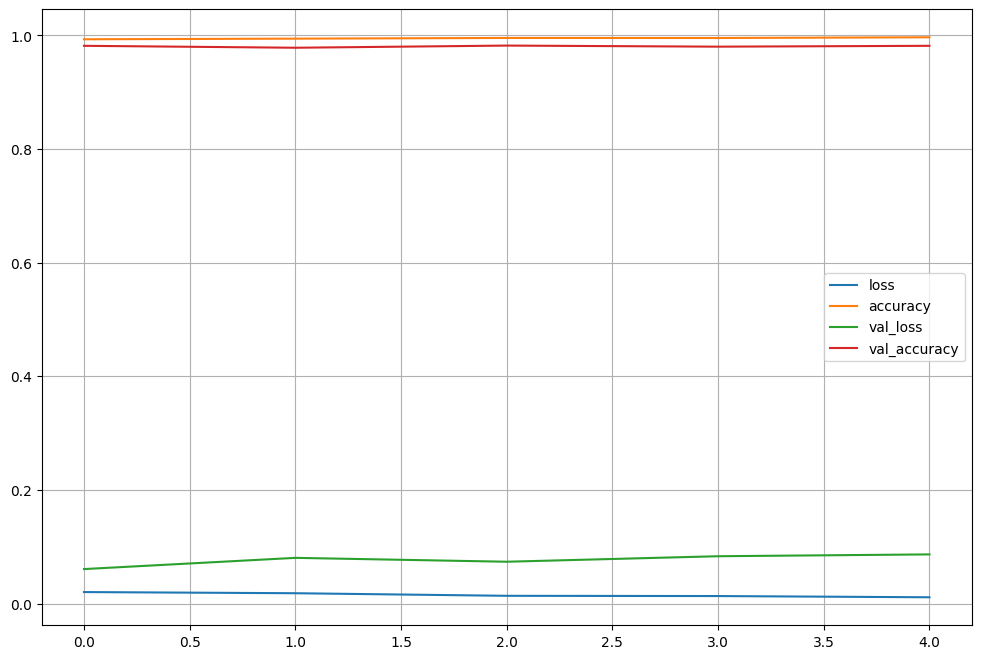

In [ ]:
#7. Í∑∏ÎûòÌîÑÎ°úÎ≥¥Í∏∞
import matplotlib.pyplot as plt

plot_target = ['loss' , 'accuracy', 'val_loss', 'val_accuracy']
plt.figure(figsize=(12, 8))

for each in plot_target:
    plt.plot(hist.history[each], label = each)
plt.legend()
plt.grid()
plt.show()

In [ ]:
#8. ÌÖåÏä§Ìä∏

score = model.evaluate(x_test, y_test)
print(f'Test Loss : {score[0]}')
print(f'Test Accuracy  : {score[1]}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0865 - accuracy: 0.9816
Test Loss : 0.08645732700824738
Test Accuracy  : 0.9815999865531921


In [ ]:
#9. Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°

import numpy as np

predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result,  axis=1)
predicted_labels[:10]

313/313 [==============================] - 1s 1ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [ ]:
#10. ÌãÄÎ¶∞Îç∞Ïù¥ÌÑ∞ Ïàò ÌôïÏù∏

wrong_result = []
for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)

len(wrong_result)

184

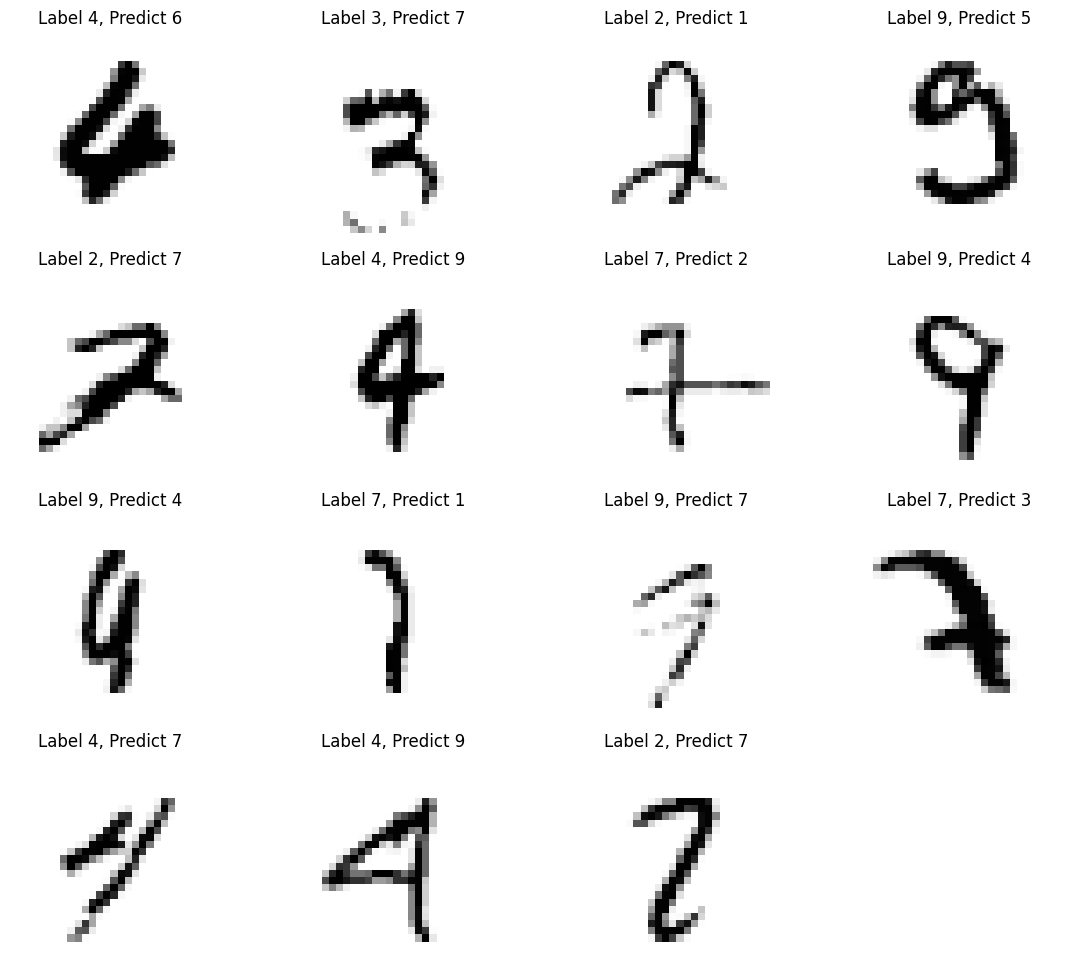

In [ ]:
#11. ÌãÄÎ¶∞Îç∞Ïù¥ÌÑ∞ 10Í∞ú Í∑∏Î†§Î≥¥Í∏∞

import random

samples = random.choices(population=wrong_result, k=15)

plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx + 1)
    plt.imshow(x_test[n].reshape(28,28), cmap = 'Greys', interpolation='nearest')
    plt.title('Label ' + str(y_test[n]) + ', Predict ' + str(predicted_labels[n]))
    plt.axis('off')

plt.show()

In [ ]:
# 12. Î™®Îç∏ Ï†ÄÏû•
model.save('MNIST_ANN_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#CNN MNIST

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import time #Î™®Îç∏ Ïª¥ÌååÏùº ÏãúÍ∞Ñ ÌôïÏù∏

#1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

X_train = X_train.reshape((60000, 28 ,28, 1))
X_test = X_test.reshape((10000, 28 ,28, 1))

#2. Î™®Îç∏Íµ¨ÏÑ±
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(5, 5),
                  strides=(1, 1),
                  padding='same',
                  activation='relu',
                  input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2),
                        strides=(2, 2)),
    layers.Conv2D(64, kernel_size=(2, 2),
                  activation='relu',
                  padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

#3. Î™®Îç∏Ïª¥ÌååÏùº
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
start_time = time.time()

#4. Î™®Îç∏ ÌõàÎ†®
hist = model.fit(X_train, y_train,
                 epochs=5,
                 verbose = 1,
                 validation_data=(X_test, y_test))
print(f'Fit Time :{time.time() - start_time}')

#5. Î™®Îç∏ Ï†ïÌôïÎèÑ
test_loss, test_acc = model.evaluate(X_test, y_test)
print('ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ:', test_acc)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten_2 (Flatten)         (None, 3136)             

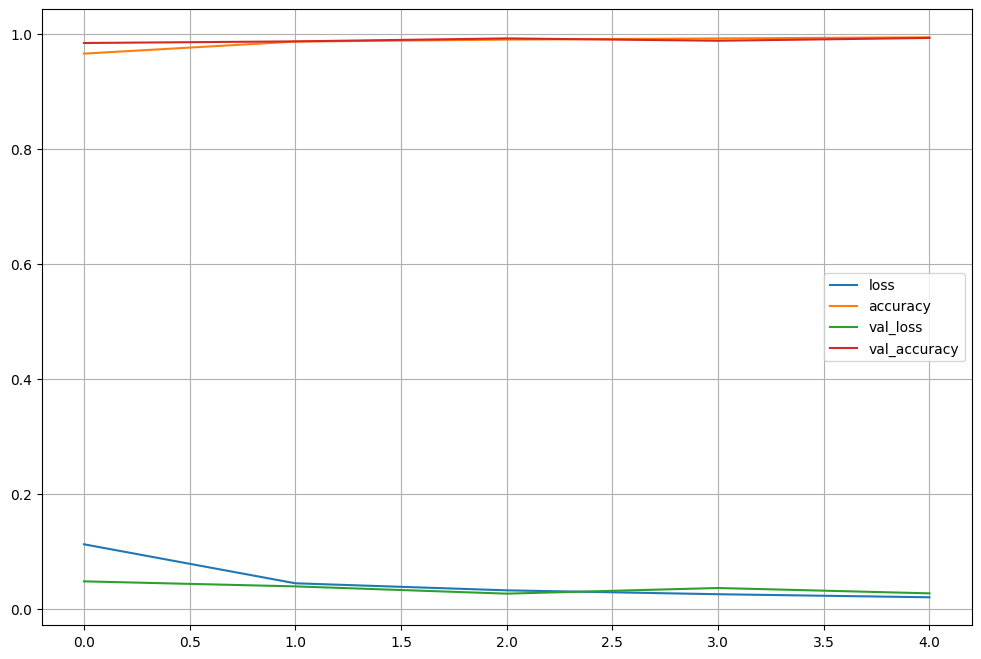

In [ ]:
#6. Í∑∏ÎûòÌîÑÎ°ú Ï∂úÎ†•

import matplotlib.pyplot as plt

plot_target = ['loss' , 'accuracy', 'val_loss', 'val_accuracy']
plt.figure(figsize=(12, 8))

for each in plot_target:
    plt.plot(hist.history[each], label = each)
plt.legend()
plt.grid()
plt.show()

In [ ]:
#7. ÌÖåÏä§Ìä∏

score = model.evaluate(X_test, y_test)
print(f'Test Loss : {score[0]}')
print(f'Test Accuracy  : {score[1]}')

313/313 [==============================] - 6s 18ms/step - loss: 0.0264 - accuracy: 0.9926
Test Loss : 0.026409780606627464
Test Accuracy  : 0.9926000237464905


In [ ]:
#8. Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result,  axis=1)
predicted_labels[:10]

313/313 [==============================] - 6s 20ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [ ]:
#9. ÌãÄÎ¶∞ Îç∞Ïù¥ÌÑ∞Îßå Î™®ÏúºÍ∏∞
wrong_result = []
for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)

len(wrong_result)

74

##Ï¥ù 1ÎßåÍ∞ú Îç∞Ïù¥ÌÑ∞ Ï§ëÏóê 74Í∞úÎ•º ÌãÄÎ¶º

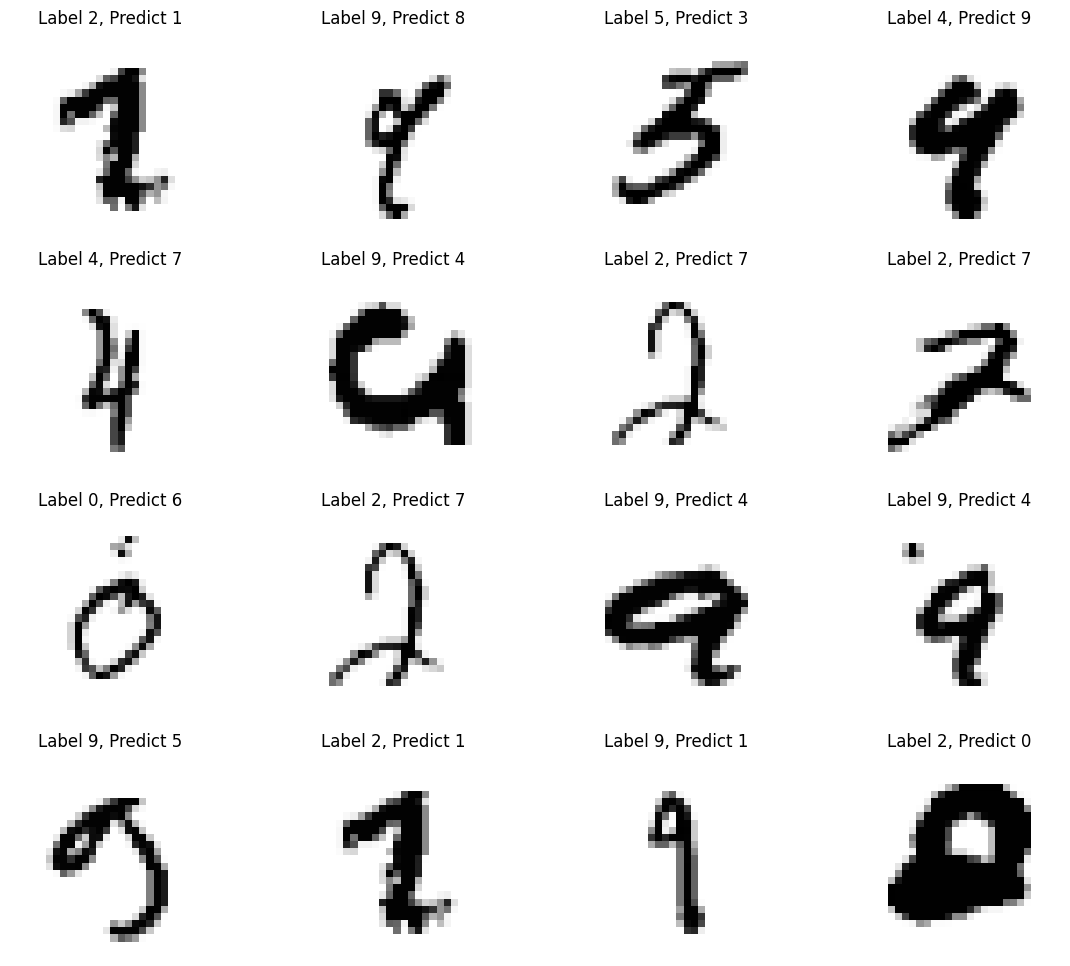

In [ ]:
#10. ÌãÄÎ¶∞ Îç∞Ïù¥ÌÑ∞ 16Í∞úÎßå ÏßÅÏ†ë Í∑∏Î†§Î≥¥Í∏∞
import random

samples = random.choices(population=wrong_result, k =16)

plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx + 1)
    plt.imshow(X_test[n].reshape(28,28), cmap = 'Greys', interpolation='nearest')
    plt.title('Label ' + str(y_test[n]) + ', Predict ' + str(predicted_labels[n]))
    plt.axis('off')

plt.show()

In [ ]:
#11. Model Save
model.save('MNIST_CNN_model.h5')

# 2. fashion-MNIST
- 70,000Í∞úÏùò ÌùëÎ∞±Ïù¥ÎØ∏ÏßÄÎ°ú Íµ¨ÏÑ±
- Í∞Å Ïù¥ÎØ∏ÏßÄÎäî (28,28) 2Ï∞®Ïõê ÌÖêÏÑúÎ°ú Íµ¨ÏÑ±
- ÌùëÎ∞±Ïù¥ÎØ∏ÏßÄ(Ï±ÑÎÑêÏóê Ìï¥ÎãπÌïòÎäî Ï∞®ÏõêÏùÄ ÏóÜÏùå)
- ÎùºÎ≤®Ï†ïÎ≥¥Îäî Í∞ÅÍ∞ÅÏùò Ïù¥ÎØ∏ÏßÄÏùò Î≤îÏ£ºÏóê Ìï¥ÎãπÌïòÎäî idÏ†ïÎ≥¥Î°ú 0-9 Ï†ïÏàòÎ°ú Íµ¨ÏÑ±
    - 0 : T-shirt/top
    - 1 : Trouser
    - 2 : Pullover
    - 3 : Dress
    - 4 : Coat
    - 5 : Sandal
    - 6 : Shirt
    - 7 : Sneaker
    - 8 : Bag
    - 9 : Ankel boot
- Ï≤òÎ¶¨Í≥ºÏ†ï
  - Ï†ÑÏ≤òÎ¶¨
    - Îç∞Ïù¥ÌÑ∞ ÏÖã Î∂ÑÎ¶¨(ÌïôÏäµ/ÌÖåÏä§Ìä∏)
    - Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨(scaling/ÌòïÎ≥ÄÌôò/ÏõêÌï´Ïù∏ÏΩîÎî©)
    - ÌïôÏäµ/Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
   - ÌïôÏäµ, Í≤ÄÏ¶ù, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ±
  -Î™®Îç∏ÎßÅ
    - Î™®Îç∏ÏÉùÏÑ±
    - Î™®Îç∏ÌïôÏäµ
  - Î™®Îç∏ ÏÑ±Îä•ÌèâÍ∞Ä
    - dropout
  - ÏãúÍ∞ÅÌôî

In [ ]:
#1. Îç∞Ïù¥ÌÑ∞Î∂àÎü¨Ïò§Í∏∞
import tensorflow as tf
from tensorflow import keras
import keras.datasets as d
import numpy as np
from tensorflow.keras.utils import to_categorical

fmnist = keras.datasets.fashion_mnist
(X_train,y_train),(X_test,y_test) = fmnist.load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


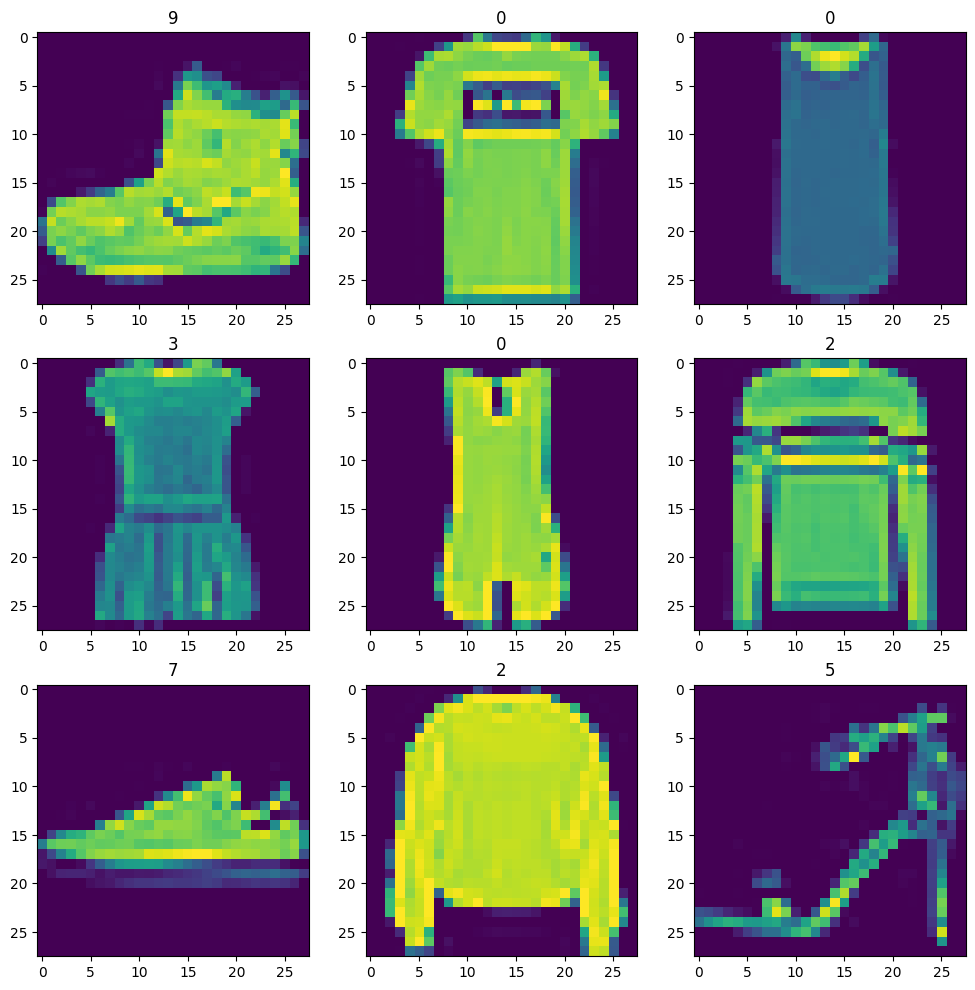

In [ ]:
#1-1 Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏(9Ïû• ÏãúÍ∞ÅÌôî)
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.title(y_train[i])
    plt.imshow(X_train[i])


In [ ]:
#2. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
#Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÌôî (0-255)

X_train2 = X_train[:,:,:,np.newaxis] #Ï∞®Ïõê Ï¶ùÍ∞Ä(3Ï∞®ÏõêÏúºÎ°ú, reshapeÏùò Ìö®Í≥º)
X_test2 = X_test[:,:,:,np.newaxis]

X_train2 = X_train2/255
X_test2 = X_test2/255

In [ ]:
#3. data Î∂ÑÎ¶¨

y_train2 = to_categorical(y_train,10)
y_test2 = to_categorical(y_test,10)

In [ ]:
#4. Î™®Îç∏ ÏÉùÏÑ±

from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D

model = Sequential()
model.add(Conv2D(filters = 32,
                 kernel_size=(3,3),
                 strides=(1,1),padding='Same',
                 activation = 'relu',
                 input_shape = (28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64,
                 kernel_size=(3,3),
                 strides=(1,1),
                 padding='Same',
                 activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32,
                 kernel_size=(3,3),
                 strides=(1,1),
                 padding='Same',
                 activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 10, activation = 'softmax'))

> fashion mnist dataÎäî mnistÏóê ÎπÑÌï¥ Ïù¥ÎØ∏ÏßÄÏùò ÌäπÏßïÏ†ÅÏù∏ Í≤ÉÎì§Ïù¥ ÎßéÏúºÎØÄÎ°ú Conv2D -> maxpoolingÏùÑ Î∞òÎ≥µÌïòÎ©¥ÏÑú ÎÖ∏Ïù¥Ï¶àÎ•º Ï†úÍ±∞ÌñàÎã§. Flatten, FC layerÎì§ÏùÑ Í±∞ÏπòÍ≥† DropoutÏùÑ ÏãúÏºú Î™®Îç∏ÏùÑ ÏÉùÏÑ±


In [ ]:
#5. Î™®Îç∏ Ïª¥ÌååÏùº

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 32)         

In [ ]:
hist = model.fit(X_train2,y_train2,
                 epochs = 3 ,
                 batch_size = 100,
                 verbose=2)
loss,acc = model.evaluate(X_test2,y_test2)
print('loss:', round(loss,3))
print('accurate:', round(acc,3))

Epoch 1/3
600/600 - 7s - loss: 0.7467 - accuracy: 0.7297 - 7s/epoch - 12ms/step
Epoch 2/3
600/600 - 2s - loss: 0.4247 - accuracy: 0.8503 - 2s/epoch - 4ms/step
Epoch 3/3
600/600 - 2s - loss: 0.3570 - accuracy: 0.8749 - 2s/epoch - 4ms/step
313/313 [==============================] - 1s 3ms/step - loss: 0.3280 - accuracy: 0.8808
loss: 0.328
accurate: 0.881


#Shape (ANN)

In [ ]:
#Íµ¨Í∏ÄÎìúÎùºÏù¥Î∏å Ïó∞Îèô
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os, re, glob
import cv2  #openCV ÎùºÏù¥Î∏åÎü¨Î¶¨ importÌïòÍ∏∞
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, Y,
                                                 test_size = 0.2,
                                                 random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size = 0.2,
                                                  random_state = 42)
print('X_train : ', X_train.shape)
print('X_val : ', X_val.shape)
print('X_test : ', X_test.shape)

X_train :  (2304, 28, 28, 3)
X_val :  (576, 28, 28, 3)
X_test :  (720, 28, 28, 3)


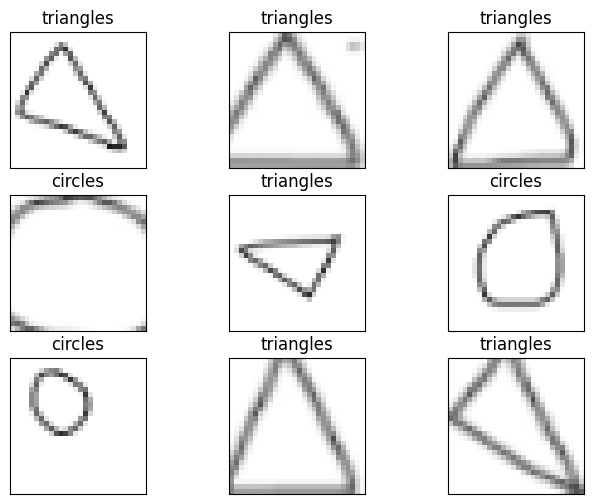

In [ ]:
import matplotlib.pyplot as plt

samples = np.random.randint(len(X_train), size=9)
class_names = ['circles', 'squares', 'triangles']

plt.figure(figsize = (8, 6))

for i, idx in enumerate(samples):
   plt.subplot(3, 3, i+1)
   plt.xticks([])
   plt.yticks([])
   plt.imshow(X_train[idx], cmap = 'gray')
   plt.title(class_names[y_train[idx]])
plt.show()

#**ÎèÑÌòï ÎßûÏ∂îÍ∏∞(CNN)**
- ÏÇºÍ∞ÅÌòï, ÏÇ¨Í∞ÅÌòï ÏõêÌòï ÎèÑÌòïÏùÑ ÌïôÏäµÌï¥ÏÑú ÎßûÏ∂îÍ∏∞


In [ ]:
!pip install keras

In [ ]:
#Íµ¨Í∏ÄÎìúÎùºÏù¥Î∏å Ïó∞Îèô
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os, re, glob
import cv2  #openCV ÎùºÏù¥Î∏åÎü¨Î¶¨ importÌïòÍ∏∞
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
def show_aug_image(image, generator, n_images=4):
    # ImageDataGeneratorÎäî Ïó¨Îü¨Í∞úÏùò imageÎ•º ÏûÖÎ†•ÏúºÎ°ú Î∞õÍ∏∞ ÎïåÎ¨∏Ïóê 4Ï∞®ÏõêÏúºÎ°ú ÏûÖÎ†• Ìï¥ÏïºÌï®.
    image_batch = np.expand_dims(image, axis=0)
    # featurewise_center or featurewise_std_normalization or zca_whitening Í∞Ä TrueÏùºÎïåÎßå fit Ìï¥Ï£ºÏñ¥ÏïºÌï®
    generator.fit(image_batch)
    # flowÎ°ú image batchÎ•º generatorÏóê ÎÑ£Ïñ¥Ï£ºÏñ¥ÏïºÌï®.
    data_gen_iter = generator.flow(image_batch)
    result=[]
    for i in range(n_images):
    	#generatorÏóê batch size ÎßåÌÅº augmentation Ï†ÅÏö©(Îß§Î≤à Ï†ÅÏö©Ïù¥ Îã§Î¶Ñ)
        aug_image_batch = next(data_gen_iter)
        aug_image = np.squeeze(aug_image_batch)
        aug_image = aug_image.astype('float')
        aug_image/=255
        result.append(aug_image)
    return result


In [ ]:
imagePath = '/content/drive/MyDrive/Colab Notebooks/shapes'
categories = ['circles', 'squares', 'triangles']
nb_classes = len(categories)

data_generator_horizontal = ImageDataGenerator(horizontal_flip=True)
data_generator_vertical = ImageDataGenerator(vertical_flip=True)
data_generator_zoom = ImageDataGenerator(zoom_range=[0.5, 0.9])

X = []
for idx, cate in enumerate(categories):
    label = [0 for i in range(nb_classes)]
    label[idx] = 1
    image_dir = imagePath+'/'+cate+'/'
    for top, dir, f in os.walk(image_dir):
        for filename in f:
            image = cv2.cvtColor(cv2.imread(image_dir+filename), cv2.COLOR_BGR2RGB)
            X+=show_aug_image(image, data_generator_horizontal, n_images=4)
            X+=show_aug_image(image, data_generator_vertical, n_images=4)
            X+=show_aug_image(image, data_generator_zoom, n_images=4)

X = np.array(X)
Y = np.concatenate([np.zeros(1200), np.full(1200, 1), np.full(1200, 2)])
Y=Y.astype(int)
print('X_Shape :' , X.shape)
print('Y_Shape :' , Y.shape)

X_Shape : (3600, 28, 28, 3)
Y_Shape : (3600,)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(
            X, Y,
            test_size = 0.2,
            random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(
            X_train, y_train,
            test_size = 0.2,
            random_state = 42)

print('X_train : ', X_train.shape)
print('X_val : ', X_val.shape)
print('X_test : ', X_test.shape)

X_train :  (2304, 28, 28, 3)
X_val :  (576, 28, 28, 3)
X_test :  (720, 28, 28, 3)


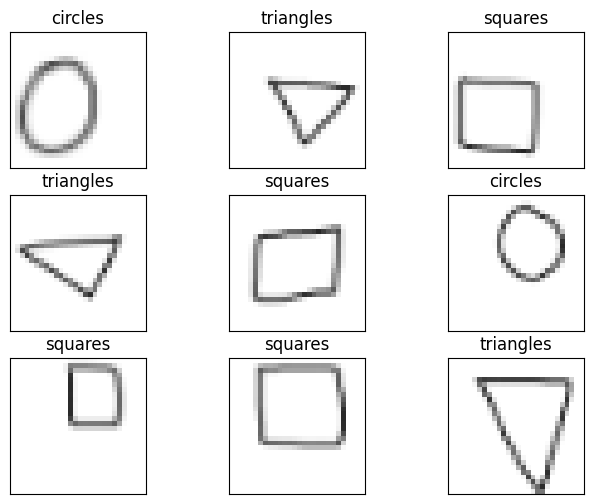

In [ ]:
import matplotlib.pyplot as plt

samples = np.random.randint(len(X_train), size=9)
class_names = ['circles', 'squares', 'triangles']

plt.figure(figsize = (8, 6))

for i, idx in enumerate(samples):
   plt.subplot(3, 3, i+1)
   plt.xticks([])
   plt.yticks([])
   plt.imshow(X_train[idx], cmap = 'gray')
   plt.title(class_names[y_train[idx]])
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(24,24,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit_generator(
        X_train,
        steps_per_epoch=15,
        epochs=50,
        validation_data=X_test,
        validation_steps=5)

# CIFAR10 CNN(keras)
- Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞ Ï†ïÍ∑úÌôî
- 0-1 ÏÇ¨Ïù¥Í∞íÏù¥ ÎêòÎèÑÎ°ù Ï†ïÍ∑úÌôî(ÏõêÎûòÏù¥ÎØ∏ÏßÄ 0-255)
  - conv-conv-pool-dense
  - conv-conv-pool-dense
  - conv-pool-dense
  - conv-pool-dense
  -flaten
  -dense-dropout
  -dense-dropout



In [ ]:
#1. Îç∞Ïù¥ÌÑ∞Î°úÎî©(ÏºÄÎùºÏä§)
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
#2. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
#Ïù¥ÎØ∏ÏßÄÏ†ïÍ∑úÌôî(0~255 Îç∞Ïù¥ÌÑ∞Î•º 0~1Î°ú Ï†ïÍ∑úÌôî)
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [ ]:
#3. ÏõêÌï´Ïù∏ÏΩîÎî©ÌïòÍ∏∞
import keras
from keras.utils import to_categorical

num_classes = len(np.unique(y_train))

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
#4. ÌõàÎ†®Îç∞Ïù¥ÌÑ∞, Í≤ÄÏ¶ùÎç∞Ïù¥ÌÑ∞ Î∂ÑÎ•ò
(x_train, x_val) = x_train[5000:], x_train[:5000]
(y_train, y_val) = y_train[5000:], y_train[:5000]

In [ ]:
#4-1 ÌõàÎ†®/ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞, Í≤ÄÏ¶ùÎç∞Ïù¥ÌÑ∞ shapeÌôïÏù∏
print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_val : ",x_val.shape)
print("y_val :",y_val.shape)
print("x_test : ",x_test.shape)
print("y_test",y_test.shape)


x_train :  (45000, 32, 32, 3)
y_train :  (45000, 10)
x_val :  (5000, 32, 32, 3)
y_val : (5000, 10)
x_test :  (10000, 32, 32, 3)
y_test (10000, 10)


In [ ]:
#5. CNN Î™®Îç∏ÎßÅ
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model=Sequential()

In [ ]:
#5-1. Ïª®Î≥ºÎ•òÏÖò Î†àÏù¥Ïñ¥ ÏåìÍ∏∞
#Ï≤´Î≤àÏß∏ Conv , ÌïôÏäµÌååÎùºÎØ∏ÌÑ∞ 16*2*2*3+16=208
model.add(Conv2D(filters = 16,
                 kernel_size = 2,
                 padding='same',
                 activation='relu',
                 input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=2))

#ÎëêÎ≤àÏß∏ Conv, 32*2*2*16+32=2080
model.add(Conv2D(filters = 32,
                 kernel_size = 2,
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=2))

#ÏÑ∏Î≤àÏß∏ Conv, 64*2*2*32+64=8256
model.add(Conv2D(filters = 64,
                 kernel_size = 2,
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=2))

In [ ]:
#5-2 ÎìúÎ°≠ÏïÑÏõÉ Ï∏µ ÏåìÍ∏∞
model.add(Dropout(0.25))

In [ ]:
#5-3 1Ï∞®ÏõêÏúºÎ°ú Î∞îÍæ∏Í∏∞
model.add(Flatten())

In [ ]:
#5-4 FC Ï∏µ ÏåìÍ∏∞
#denseÏ∏µ ÌïôÏäµ ÌååÎùºÎØ∏ÌÑ∞ : (4*4*64)*500+500=512,500
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))

#denseÏ∏µ ÌïôÏäµ ÌååÎùºÎØ∏ÌÑ∞ : 500*10+10=5,010
model.add(Dense(10, activation='softmax'))


In [ ]:
#6 ÏöîÏïΩ
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 16)        208       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 16, 16, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 32)        2080      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 64)          8256      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 4, 4, 64)         

## Î™®Îç∏ Ïª¥ÌååÏùº Î∞è Î™®Îç∏ ÌïôÏäµÍ≥º ÌèâÍ∞Ä
###(1) loss='categorical_crossentropy', optimizer='rmsprop'

In [ ]:
#1. Î™®Îç∏ Ïª¥ÌååÏùº(categorical_crossentropy)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [ ]:
#2. Î™®Îç∏ÌïôÏäµ
from keras.callbacks import ModelCheckpoint

checkpoint= ModelCheckpoint(filepath='model.weights.best.hdf5',
                            vervose =1,
                            save_best_only=True)
hist = model.fit(x_train, y_train,
                 batch_size=32,
                 epochs=10,
                 validation_data=(x_val, y_val),
                 callbacks=[checkpoint],
                 verbose=2,
                 shuffle=True)

Epoch 1/10
1407/1407 - 7s - loss: 1.6066 - accuracy: 0.4160 - val_loss: 1.4058 - val_accuracy: 0.4978 - 7s/epoch - 5ms/step
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1407/1407 - 5s - loss: 1.2541 - accuracy: 0.5497 - val_loss: 1.1826 - val_accuracy: 0.5604 - 5s/epoch - 4ms/step
Epoch 3/10
1407/1407 - 6s - loss: 1.1162 - accuracy: 0.6050 - val_loss: 1.1721 - val_accuracy: 0.5844 - 6s/epoch - 4ms/step
Epoch 4/10
1407/1407 - 5s - loss: 1.0380 - accuracy: 0.6342 - val_loss: 0.9593 - val_accuracy: 0.6682 - 5s/epoch - 3ms/step
Epoch 5/10
1407/1407 - 5s - loss: 0.9898 - accuracy: 0.6529 - val_loss: 0.9292 - val_accuracy: 0.6772 - 5s/epoch - 4ms/step
Epoch 6/10
1407/1407 - 5s - loss: 0.9529 - accuracy: 0.6687 - val_loss: 0.9428 - val_accuracy: 0.6772 - 5s/epoch - 4ms/step
Epoch 7/10
1407/1407 - 5s - loss: 0.9240 - accuracy: 0.6799 - val_loss: 0.9164 - val_accuracy: 0.6884 - 5s/epoch - 4ms/step
Epoch 8/10
1407/1407 - 5s - loss: 0.9115 - accuracy: 0.6857 - val_loss: 0.9941 - val_accuracy: 0.6654 - 5s/epoch - 4ms/step
Epoch 9/10
1407/1407 - 5s - loss: 0.9022 - accuracy: 0.6906 - val_loss: 1.0756 - val_accuracy: 0.6266 - 5s/epoch - 3ms/step
Epoch 10/10
1407/14

In [ ]:
#3. ÏµúÏÉÅ val_acc
model.load_weights('model.weights.best.hdf5')

In [ ]:
#4. Î™®Îç∏ÌèâÍ∞Ä
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.9415051937103271
Test accuracy: 0.6712999939918518


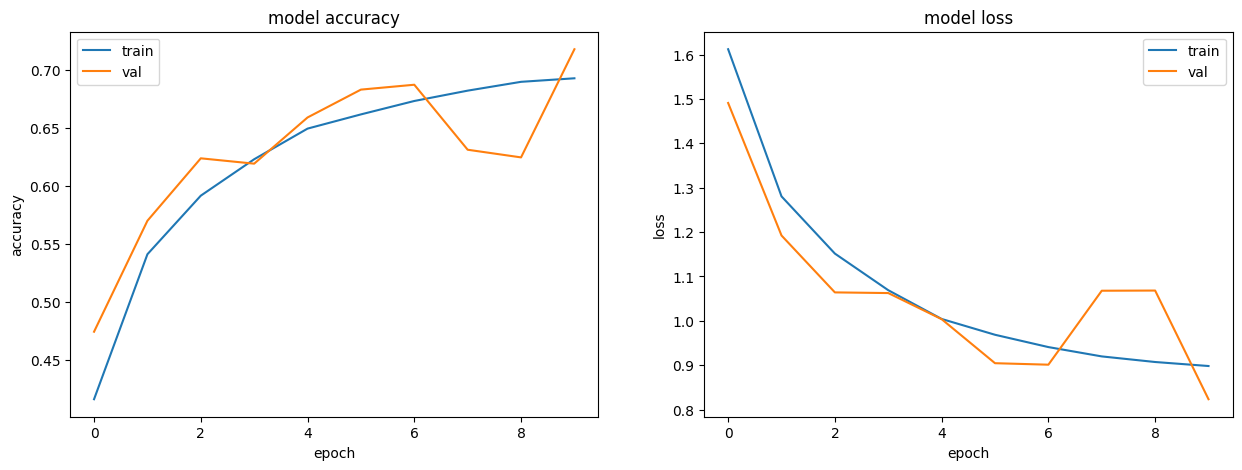

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(15, 5))  # Use plt.subplots() to create multiple subplots

# model accuracy
plt.subplot(1, 2, 1)  # Access the first subplot
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')

# model loss
plt.subplot(1, 2, 2)  # Access the second subplot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()


# CIFAR 10 Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï


###(2) loss=sparse_categorical_crossentropy
- optimizer='adam'
- batch size=256
- epoch=250

In [ ]:
#1. Îç∞Ïù¥ÌÑ∞Î°úÎî©(ÏºÄÎùºÏä§)
import cv2  #openCV ÎùºÏù¥Î∏åÎü¨Î¶¨ importÌïòÍ∏∞
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
def show_aug_image(image, generator, n_images=4):
    # ImageDataGeneratorÎäî Ïó¨Îü¨Í∞úÏùò imageÎ•º ÏûÖÎ†•ÏúºÎ°ú Î∞õÍ∏∞ ÎïåÎ¨∏Ïóê 4Ï∞®ÏõêÏúºÎ°ú ÏûÖÎ†• Ìï¥ÏïºÌï®.
    image_batch = np.expand_dims(image, axis=0)
    # featurewise_center or featurewise_std_normalization or zca_whitening Í∞Ä TrueÏùºÎïåÎßå fit Ìï¥Ï£ºÏñ¥ÏïºÌï®
    generator.fit(image_batch)
    # flowÎ°ú image batchÎ•º generatorÏóê ÎÑ£Ïñ¥Ï£ºÏñ¥ÏïºÌï®.
    data_gen_iter = generator.flow(image_batch)
    result=[]
    for i in range(n_images):
    	#generatorÏóê batch size ÎßåÌÅº augmentation Ï†ÅÏö©(Îß§Î≤à Ï†ÅÏö©Ïù¥ Îã§Î¶Ñ)
        aug_image_batch = next(data_gen_iter)
        aug_image = np.squeeze(aug_image_batch)
        aug_image = aug_image.astype('float')
        aug_image/=255
        result.append(aug_image)
    return result

In [ ]:
#2. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
#Ïù¥ÎØ∏ÏßÄÏ†ïÍ∑úÌôî(0~255 Îç∞Ïù¥ÌÑ∞Î•º 0~1Î°ú Ï†ïÍ∑úÌôî)
x_train = x_train.astype('float32')   # ÌÉÄÏûÖ Î≥ÄÍ≤Ω ( 255Î°ú ÎÇòÎàÑÍ∏∞ ÏúÑÌï¥ÏÑú )
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape', x_train.shape)
print(x_train.shape[0] , ' train sample')
print(x_test.shape[0], ' test sample')

y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test, 10)

x_train shape (50000, 32, 32, 3)
50000  train sample
10000  test sample


In [ ]:
#3. Î™®Îç∏ ÏÉùÏÑ±
model = Sequential()

# 32 : filter Ïàò
# 3x3 filter
# ÏûÖÎ†•Îç∞Ïù¥ÌÑ∞ : 128x 28x 28x 1 => (128 x 26 x 26 x 32)
# padding : valid(default)
model.add(Conv2D(32, 3, 3 ,
                 activation='relu',
                 input_shape=(28,28,3)))   # activation : relu : ÏùåÏàò Ï†úÍ±∞
# ÏïÑÏõÉÌíã :  32 x 24 x 24 x 64
model.add(Conv2D(64,3,3,
                 activation = 'relu'))
# 32 x 12 x 12 x 64
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# 12 x 12 x 64 Í∞Ä 1Ï∞®ÏõêÏúºÎ°ú Îê®( 9216 )
model.add(Flatten())

# FFNNÎßù (=FCÎßù)
# input : 128 x 9216
# Í∞ÄÏ§ëÏπò : 9216 x 128
# output : 128 x 128
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))  # Í≥ÑÏÇ∞ÌöåÎ°úÎßå ÏÉùÎûµ

# input : 128 x 128
# Í∞ÄÏ§ëÏπò : 128 x 10
# output : 128 x 10
model.add(Dense(10, activation='softmax'))

In [ ]:
#4. Î™®Îç∏ fit()
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer = keras.optimizers.Adadelta(),
             metrics = ['accuracy'])

# train,validation //// test
class AccuracyHistory(keras.callbacks.Callback):
    # Ïò§Î≤ÑÎùºÏù¥Îî© ( Ïû¨Ï†ïÏùò )
    def on_train_begin(self, logs={}):  # ÌõàÎ†® ÏãúÏûë Ïãú Ïù¥Î≤§Ìä∏ Î∞úÏÉù
        self.acc =[]
    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))

history = AccuracyHistory()

hist=model.fit(x_train, y_train,
                    batch_size = 32,
                    epochs = 10,
                    verbose =1,
          validation_data = (x_test, y_test),
          callbacks = [history])
score = model.evaluate(x_test, y_test, verbose=0)

score[0] # lossÍ∞í
score[1] # accuracy Í∞í

In [ ]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
#2-1 Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï

from tf.keras.models import Sequential
from tf.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from tf.keras.optimizers import Adam

from keras.preprocessing.image import ImageDataGenerator
import numpy as np

gen=ImageDataGenerator(rotation_range=20,
                       shear_range=0.2,
                       width_shift_range=0.2,
                       height_shift_range=0.2,
                       horizontal_flip=True)
#150%
augment_ratio=1.5
augment_size=int(x_train.shape[0]*augment_ratio)

randidx=np.random.randint(x_train.shape[0],size=augment_size)
#ÏõêÎ≥∏Îç∞Ïù¥ÌÑ∞ Î≥µÏÇ¨copy()
x_aug=x_train[randidx].copy()
y_aug=y_train[randidx].copy()

In [ ]:
x_aug, y_aug = gen.flow(x_aug, y_aug,
                        batch_size=augment_size,
                        shuffle=False).next()

x_train=np.concatenate((x_train,x_aug))
y_train=np.concatenate((y_train,y_aug))

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

x_train shape: (200000, 32, 32, 3)
y_train shape: (200000, 1)


In [ ]:
# Ï¶ùÍ∞ïÎêú Îç∞Ïù¥ÌÑ∞Î•º ÌïôÏäµÎç∞Ïù¥ÌÑ∞Î°ú ÏÇ¨Ïö©ÌïòÍ≥† Ï†ïÎãµ Îç∞Ïù¥ÌÑ∞Î•º ÎûúÎç§ÌïòÍ≤å ÏÑûÏùå
s=np.arange(x_train.shape[0])
np.random.shuffle(s)

x_train=x_train[s]
y_train=y_train[s]

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

#5-1. Ïª®Î≥ºÎ•òÏÖò Î†àÏù¥Ïñ¥ ÏåìÍ∏∞
cnn = Sequential()

cnn.add(Conv2D(32,(3,3), activation='relu', padding='same', input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3), activation='relu', padding='same'))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(64,(3,3), activation='relu', padding='same'))
cnn.add(Conv2D(64,(3,3), activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(128,(3,3), activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(128,(3,3), activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(256,(3,3), activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
#3Ï∞®Ïõê ÌÖêÏÑúÎ•º 1Ï∞®Ïõê Î≤°ÌÑ∞Î°ú Î≥ÄÌôò
cnn.add(Flatten())

cnn.add(Dense(128, activation='relu')) #ÏùÄÎãâÏ∏µ
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))#Ï∂úÎ†•Ï∏µ

In [ ]:
#6 ÏöîÏïΩ
cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 dropout_14 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 conv2d_20 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                      

## Î™®Îç∏ Ïª¥ÌååÏùº Î∞è Î™®Îç∏ ÌïôÏäµÍ≥º ÌèâÍ∞Ä
###(1) loss='categorical_crossentropy', optimizer='adam'

In [ ]:
#1. Î™®Îç∏ Ïª¥ÌååÏùº(categorical_crossentropy)
cnn.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
#2. Î™®Îç∏ÌïôÏäµ
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical

checkpoint= ModelCheckpoint(filepath='cnn.weights.best.hdf5',
                            vervose =1,
                            save_best_only=True)

# one-hot encoding
y_train_encoded = to_categorical(y_train, num_classes=10)
y_val_encoded = to_categorical(y_val, num_classes=10)
print("x_train shape:", x_train.shape)
print("y_train_encoded shape:", y_train_encoded.shape)
print("x_val shape:", x_val.shape)
print("y_val_encoded shape:", y_val_encoded.shape)

hist2 = cnn.fit(x_train, y_train_encoded, # Use encoded labels
                 batch_size=256,
                 epochs=250,
                 validation_data=(x_val, y_val_encoded))

In [ ]:
#3. ÏµúÏÉÅ val_acc
cnn.load_weights('model.weights_CNN_agumented.best.hdf5')

In [ ]:
#4. Î™®Îç∏ÌèâÍ∞Ä
score = cnn.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.9425334930419922
Test accuracy: 0.6743000149726868


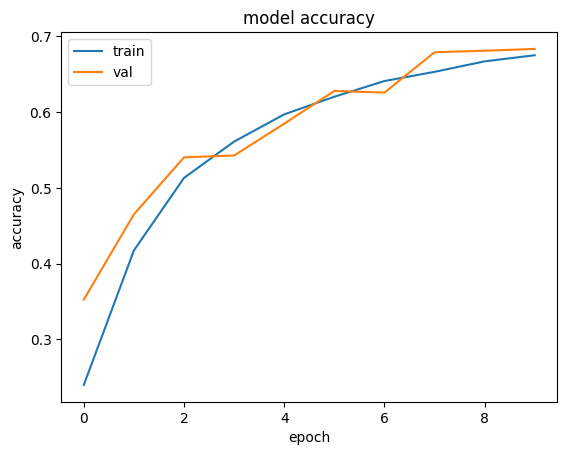

In [ ]:
#5. ÏãúÍ∞ÅÌôî
import matplotlib.pyplot as plt

plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.title('Data Augmention Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.grid
plt.show()

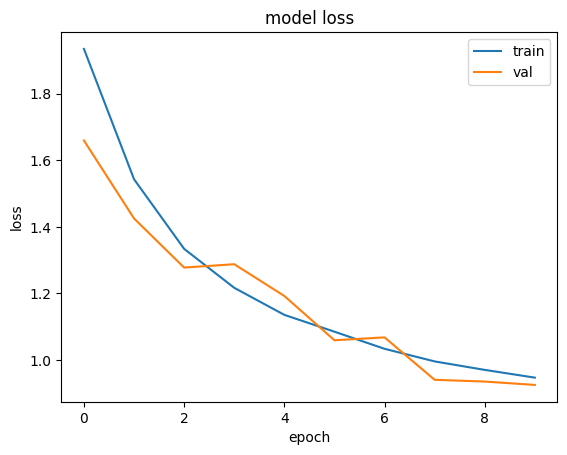

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Data Augmention Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.grid
plt.show()

#ÏºÄÍ∏Ä Îç∞Ïù¥ÌÑ∞ Ïó∞ÎèôÌïòÍ∏∞
- !pip install kaggle

In [ ]:
!pip install kaggle

In [ ]:
#ÏºÄÍ∏Ä json upload

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"youngbokcho","key":"ed8a5ef7d0c7dc1a347a60d0cdfc185c"}'}

In [ ]:
# ÏºÄÍ∏Ä ÌååÏùº ÎßåÎì§Í∏∞
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Permission Warning Ïù¥ ÏùºÏñ¥ÎÇòÏßÄ ÏïäÎèÑÎ°ù
!chmod 600 ~/.kaggle/kaggle.json

# ÏºÄÍ∏Ä Ï†úÏù¥Ïä® ÌååÏùº Ï†úÎåÄÎ°ú ÏÑ§Ïπò Îê¨ÎäîÏßÄ ÌôïÏù∏
!ls -lha kaggle.json # kaggle.json Ïù¥Î†áÍ≤å Îú∏


-rw-r--r-- 1 root root 67 Jul  1 10:06 kaggle.json


In [ ]:
!kaggle datasets list

ref                                                             title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rabieelkharoua/students-performance-dataset                     üìö Students Performance Dataset üìö                    66KB  2024-06-12 23:09:20           6645        138  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024               Most Streamed Spotify Songs 2024                   496KB  2024-06-15 18:50:51           5259        111  1.0              
shreyanshverma27/online-sales-dataset-popular-marketplace-data  Online Sales Dataset - Popular Marketplace Data      7KB  2024-05-25 23:55:26          13138        231  1.0              
anthonytherrien/restaurant-revenue-prediction-dataset      

In [ ]:
! kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
100% 612M/612M [00:20<00:00, 38.6MB/s]
100% 612M/612M [00:20<00:00, 31.6MB/s]


In [ ]:
# zip ÌååÏùº ÌíÄÍ∏∞

!unzip /content/gtsrb-german-traffic-sign.zip

Ïä§Ìä∏Î¶¨Î∞ç Ï∂úÎ†• ÎÇ¥Ïö©Ïù¥ Í∏∏Ïñ¥ÏÑú ÎßàÏßÄÎßâ 5000Ï§ÑÏù¥ ÏÇ≠Ï†úÎêòÏóàÏäµÎãàÎã§.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: tra

In [ ]:
#
import pandas as pd
import numpy as np

import os
import pathlib

import cv2 #ÏòÅÏÉÅÏ≤òÎ¶¨Ïóê ÏÇ¨Ïö©ÌïòÎäî Ïò§ÌîàÏÜåÏä§ ÎùºÏù¥Î∏åÎü¨Î¶¨, Ïª¥Ìì®ÌÑ∞Í∞Ä ÏÇ¨Îûå ÎààÏ≤òÎüº Ïù∏ÏãùÌï† Ïàò ÏûàÍ≤å Ï≤òÎ¶¨
from PIL import Image # ÌååÏù¥Ïç¨ Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨ pillow ÎùºÏù¥Î∏åÎü¨Î¶¨
from tensorflow.keras.preprocessing import image


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator #imagedatageneraterÎäî Ïù¥ÎØ∏ÏßÄÎ•º ÌïôÏäµÏãúÌÇ¨ Îïå ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïùò ÏñëÏù¥ Ï†ÅÏùÑ Í≤ΩÏö∞ ÌïôÏäµÎç∞Ïù¥ÌÑ∞Î•º Ï°∞Í∏àÏî© Î≥ÄÌòï ÏãúÏºúÏÑú ÌïôÏäµÎç∞Ïù¥ÌÑ∞Ïùò ÏñëÏùÑ ÎäòÎ¶¨Îäî Î∞©ÏãùÏ§ë ÌïòÎÇò
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img, load_img
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')#Í∑∏ÎûòÌîÑ Ïä§ÌÉÄÏùº ÏßÄÏ†ï

In [ ]:
#ÎÇúÏàò ÎûúÎç§ÏÑ± Í≥†Ï†ï
np.random.seed(42)

%matplotlib inline

In [ ]:
# ÏΩîÎ†ôÏùÄ Ï¢åÏ∏° ÌååÏùº ÏïÑÏù¥ÏΩò ÌÅ¥Î¶≠Ìï¥ÏÑú ÎßàÏö¥ÌåÖÎêú ÌååÏùº ÌïòÎÇòÎ•º Ïò§Î•∏Ï™Ω ÎßàÏö∞Ïä§ ÌÅ¥Î¶≠ÌïòÎ©¥ Í≤ΩÎ°ú Ïπ¥ÌîºÌï† Ïàò ÏûàÏùå
data_dir = pathlib.Path('/content/Meta')
train_path = pathlib.Path('/content/Train')
test_path = pathlib.Path('/content/Test')

In [ ]:
# Ï†ÑÏ≤òÎ¶¨: Ïù¥ÎØ∏ÏßÄ Î≥ÑÎ°ú ÏÇ¨Ïù¥Ï¶àÍ∞Ä Îã§Î•¥Í∏∞ ÎïåÎ¨∏Ïóê Ïù¥ÎØ∏ÏßÄÏùò Ìè≠Í≥º ÎÜíÏù¥Î•º Í∞ôÏùÄ ÌÅ¨Í∏∞Î°ú ÌÜµÏùº
IMG_HEGHT = 30
IMG_WIDTH = 30
channels = 3

In [ ]:
# Ïπ¥ÌÖåÍ≥†Î¶¨ Ïàò ÌôïÏù∏
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

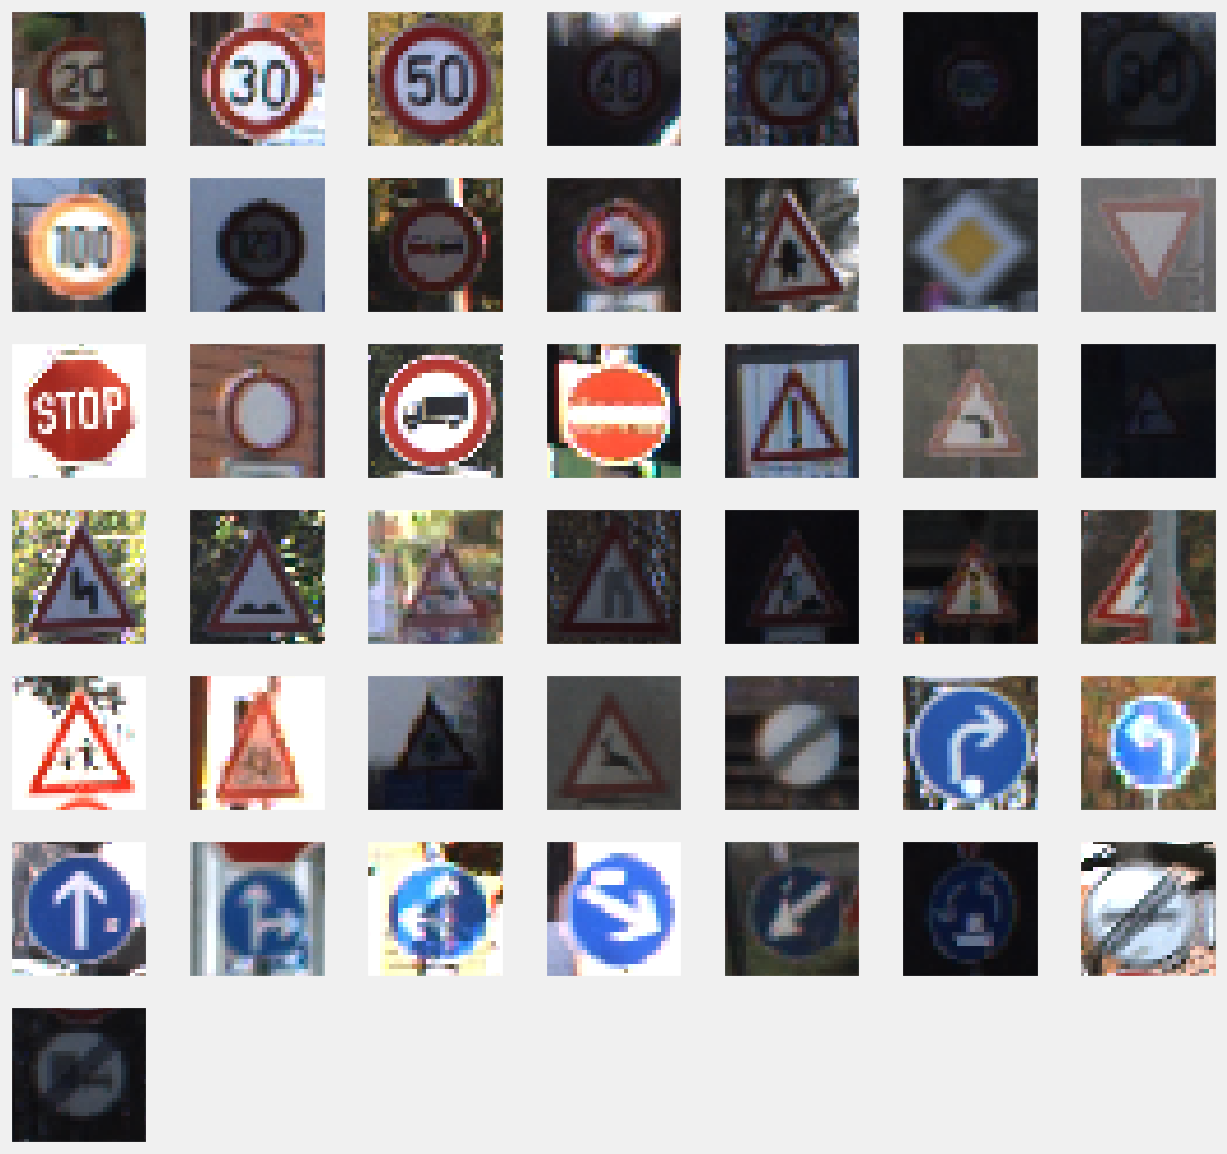

In [ ]:
# Î™®Îì† ÍµêÌÜµÌëúÏãúÌåê ÏãúÍ∞ÅÌôî
# pathlibÎ™®ÎìàÏùÑ ÏÇ¨Ïö©ÌïòÎ©¥, ÌååÏùº, ÎîîÎ†âÌÜ†Î¶¨(Ìè¥Îçî)Ïùò Í≤ΩÎ°úÎ•º Í∞ùÏ≤¥Î°úÏç® Ï°∞ÏûëÌïòÍ±∞ÎÇò Ï≤òÎ¶¨Ìï† Ïàò ÏûàÎã§

img_dir = pathlib.Path('/content/train')
plt.figure(figsize=(14,14))
index = 0
for i in range(NUM_CATEGORIES):
    plt.subplot(7, 7, i+1)
    plt.grid(False)
    plt.xticks([]) #ÎààÍ∏à ÏÑ§Ï†ï ÏóÜÏùå
    plt.yticks([])
    sign = list(img_dir.glob(f'{i}/*'))[0] #globÎ™®ÎìàÏùò globÌï®ÏàòÎäî ÏÇ¨Ïö©ÏûêÍ∞Ä Ï†úÏãúÌïú Ï°∞Í±¥Ïóê ÎßûÎäî ÌååÏùºÎ™ÖÏùÑ Î¶¨Ïä§Ìä∏ÌòïÏãùÏúºÎ°ú Î∞òÌôò #*(ÏïÑÏä§ÌÑ∞Î¶¨Ïä§ÌÅ¨)Îäî ÏûÑÏùò Í∏∏Ïù¥Ïùò Î™®Îì† Î¨∏ÏûêÏó¥ÏùÑ ÏùòÎØ∏
    img = load_img(sign, target_size=(30, 30))
    plt.imshow(img)
plt.show()

In [ ]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }

In [ ]:
#os.listdir() Îß§Ïç®ÎìúÎäî ÏßÄÏ†ïÌïú ÎîîÎ†âÌÜ†Î¶¨ ÎÇ¥Ïùò Î™®Îì† ÌååÏùºÍ≥º ÎîîÎ†âÌÜ†Î¶¨ Î¶¨Ïä§Ìä∏(list)Î•º Î¶¨ÌÑ¥
folders = os.listdir('/content/train')

In [ ]:
train_num = []
class_num = []

for folder in folders:
  train_files = os.listdir(str(train_path) + '/'+ folder) #Î¶¨Ïä§Ìä∏Î°ú Í∞ÄÏ†∏Ïò§Î©¥ ÏóêÎü¨Îñ†ÏÑú strÎ°ú Î≥ÄÌôòÌï¥Ï§å
  train_num.append(len(train_files))
  class_num.append(classes[int(folder)])

In [ ]:
# Í∞ÅÍ∞ÅÏùò ÌÅ¥ÎûòÏä§Ïùò Ïù¥ÎØ∏ÏßÄÏùò ÏàòÏóê Í∏∞Ï¥àÌï¥ Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ•òÌïòÍ∏∞
zipped_lists =  zip(train_num, class_num)
sorted_pairs = sorted(zipped_lists)
tuples =  zip(*sorted_pairs) # sorted(Ï†ïÎ†¨Ìï† Îç∞Ïù¥ÌÑ∞), ÏÉàÎ°úÏö¥ Ï†ïÎ†¨Îêú Î¶¨Ïä§Ìä∏Î°ú ÎßåÎì§Ïñ¥ÏÑú Î∞òÌôò
train_num, class_num = [ list(tuple) for tuple in tuples]

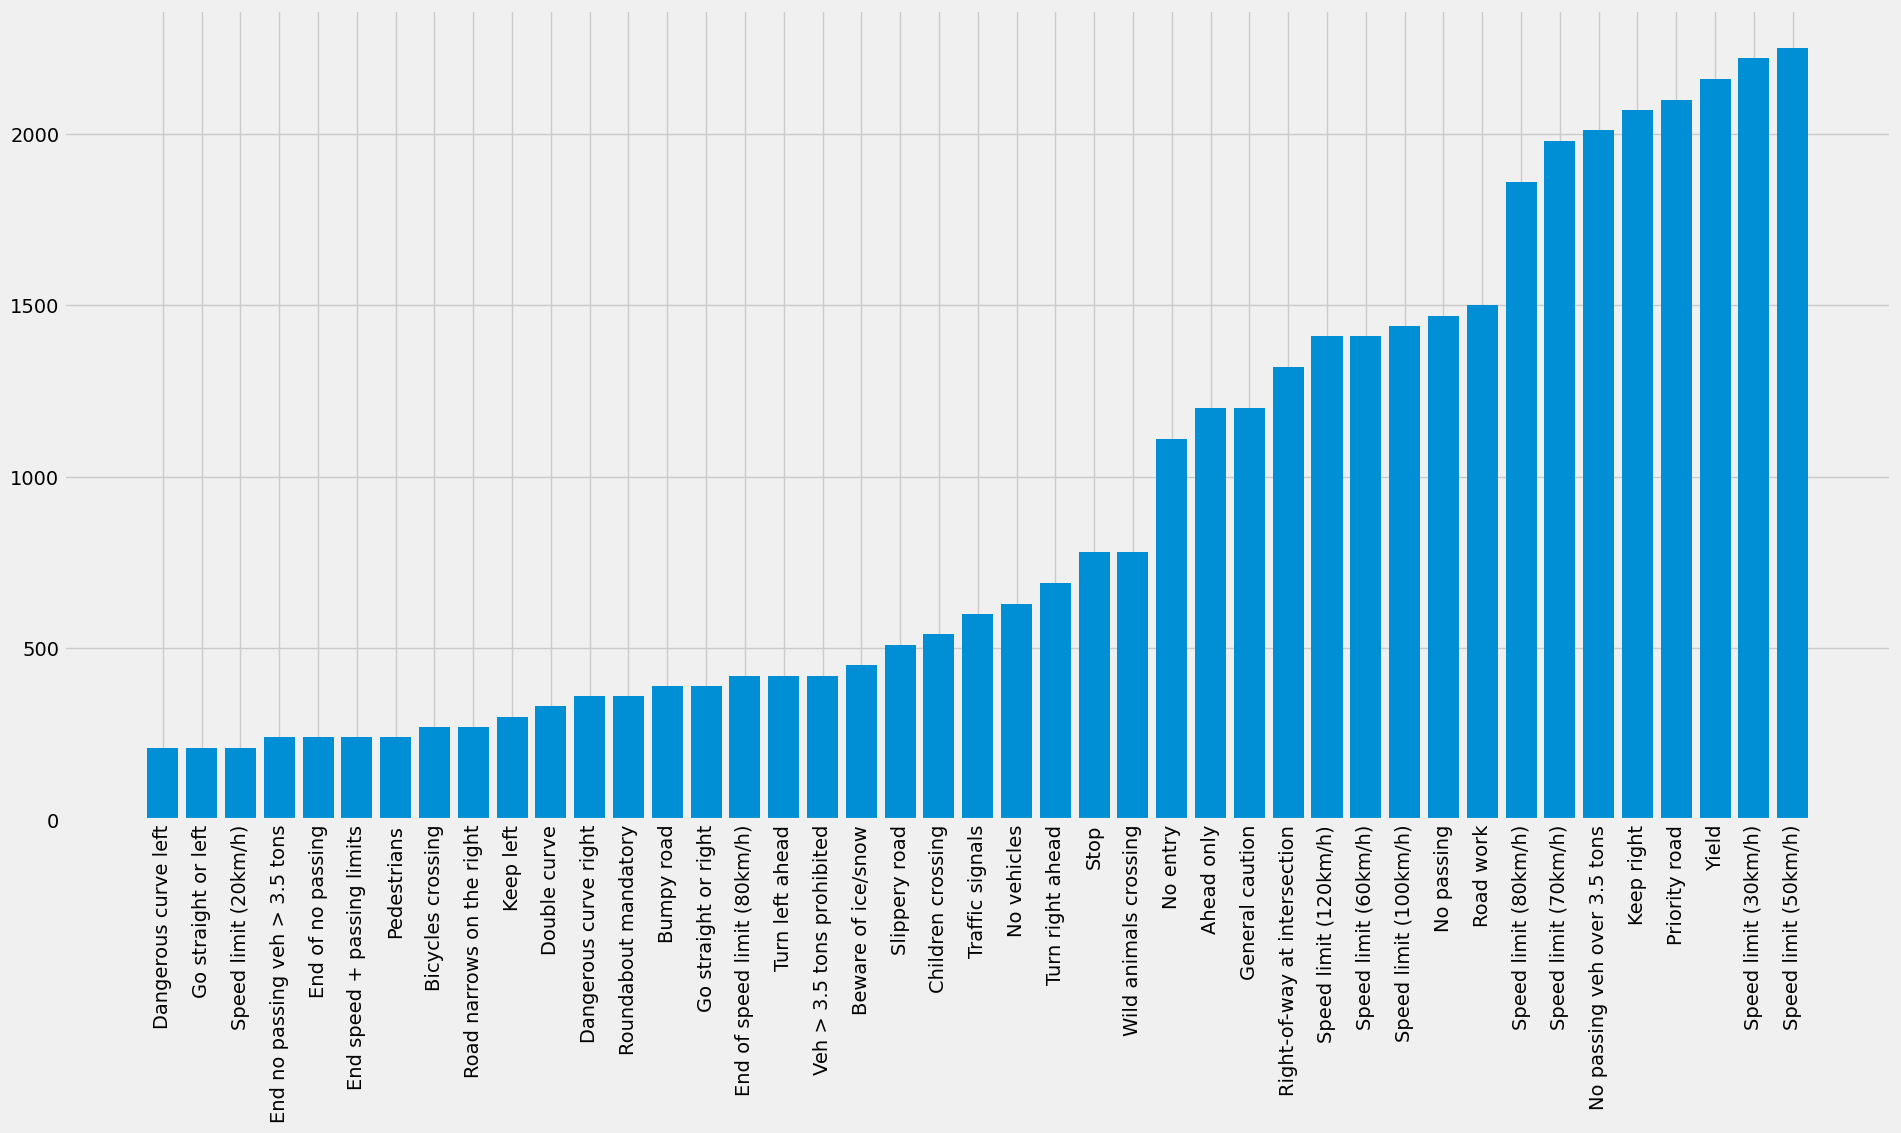

In [ ]:
# ÏãúÍ∞ÅÌôî
plt.figure(figsize = (21, 10))
plt.bar(class_num, train_num)
plt.xticks(class_num, rotation='vertical')
plt.show()

In [ ]:
def load_data(data_dir):
    images = list()
    labels = list()
    for category in range(NUM_CATEGORIES):
        categories = os.path.join(data_dir, str(category))
        for img in os.listdir(categories):
            img = load_img(os.path.join(categories, img), target_size=(30, 30))
            image = img_to_array(img) # Ïù¥ÎØ∏ÏßÄÎ•º ÎÑòÌååÏù¥ Î∞∞Ïó¥Î°ú Î≥ÄÌôò
            images.append(image)
            labels.append(category)

    return images, labels

images, labels = load_data(train_path)


In [ ]:
# labelsÏóê ÏõêÌï´ Ïù∏ÏΩîÎî© ÏßÑÌñâ
labels = to_categorical(labels)

# Ìä∏Î†àÏù∏, ÌÖåÏä§Ìä∏ ÏÖã Îç∞Ïù¥ÌÑ∞ ÎÇòÎàÑÍ∏∞
x_train, x_test, y_train, y_test = train_test_split(np.array(images), labels, test_size=0.4)

In [ ]:
model = Sequential()

# Ï≤´Î≤àÏß∏ Convolutional Layer : ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞Î°úÎ∂ÄÌÑ∞ ÌäπÏßïÏùÑ Ï∂îÏ∂ú
model.add(Conv2D(filters=32,
                 kernel_size=3,
                 activation='relu',
                 input_shape=(30,30,3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# ÎëêÎ≤àÏß∏ Convolutional Layer
model.add(Conv2D(filters=64,
                 kernel_size=3,
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25)) # Ïù∏ÌíãÎç∞Ïù¥ÌÑ∞Ïùò 25%Î•º Î¨¥ÏûëÏúÑÎ°ú 0ÏúºÎ°ú ÎßåÎì¶

# ÏÑ∏Î≤àÏß∏ Convolutional Layer
# ÌäπÏßïÏùÑ Ï∂îÏ∂úÌïòÎäî Í∏∞Îä•ÏùÑ ÌïòÎäî ÌïÑÌÑ∞, ÎπÑÏÑ†Ìòï Í∞íÏúºÎ°ú Î∞îÍøîÏ£ºÎäî activation Ìï®Ïàò->relu
model.add(Conv2D(filters=64,
                 kernel_size=3,
                 activation='relu'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 6, 6, 64)         

In [ ]:
# Flattening the layer and adding Dense Layer
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(NUM_CATEGORIES, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 6, 6, 64)         

In [ ]:
# Î™®Îç∏ Ïª¥ÌååÏùº ÌïòÍ∏∞
model.compile(
    loss='categorical_crossentropy', # Îã§Ï§ëÎ∂ÑÎ•òÏùò Î°úÏä§ Ìï®Ïàò
    optimizer='adam',
    metrics=['accuracy']
)


In [ ]:
# Î™®Îç∏ ÌïèÌïòÍ∏∞
history = model.fit(x_train,
                    y_train,
                    validation_data = (x_test, y_test),
                    epochs=30,
                    steps_per_epoch=60
                   )

Epoch 1/30
60/60 [==============================] - 8s 48ms/step - loss: 6.2211 - accuracy: 0.0372 - val_loss: 3.5325 - val_accuracy: 0.0935
Epoch 2/30
60/60 [==============================] - 2s 28ms/step - loss: 3.3046 - accuracy: 0.1519 - val_loss: 2.8587 - val_accuracy: 0.3038
Epoch 3/30
60/60 [==============================] - 2s 27ms/step - loss: 2.4644 - accuracy: 0.3765 - val_loss: 1.8722 - val_accuracy: 0.5439
Epoch 4/30
60/60 [==============================] - 2s 27ms/step - loss: 1.7593 - accuracy: 0.5418 - val_loss: 1.2644 - val_accuracy: 0.6978
Epoch 5/30
60/60 [==============================] - 2s 27ms/step - loss: 1.1908 - accuracy: 0.6752 - val_loss: 0.7586 - val_accuracy: 0.8198
Epoch 6/30
60/60 [==============================] - 2s 27ms/step - loss: 0.8051 - accuracy: 0.7683 - val_loss: 0.5352 - val_accuracy: 0.8710
Epoch 7/30
60/60 [==============================] - 2s 28ms/step - loss: 0.6173 - accuracy: 0.8189 - val_loss: 0.4016 - val_accuracy: 0.9009
Epoch 8/30
60

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print('test set accuracy: ', accuracy * 100)

491/491 [==============================] - 1s 2ms/step - loss: 0.0725 - accuracy: 0.9846
test set accuracy:  98.46340417861938


In [ ]:
#ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï†ïÌôïÎèÑ
Y_test = pd.read_csv('/content/Test.csv')
test_labels = Y_test["ClassId"].values
test_images = Y_test["Path"].values

a =  pathlib.Path('/content/')

output = list()
for img in test_images:
    image = load_img(os.path.join(a, img), target_size=(30, 30))
    output.append(np.array(image))

X_test=np.array(output)
y_prob = model.predict(X_test)
pred = y_prob.argmax(axis=-1)

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(test_labels, pred)*100)

395/395 [==============================] - 1s 2ms/step
Test Data accuracy:  93.61836896278702


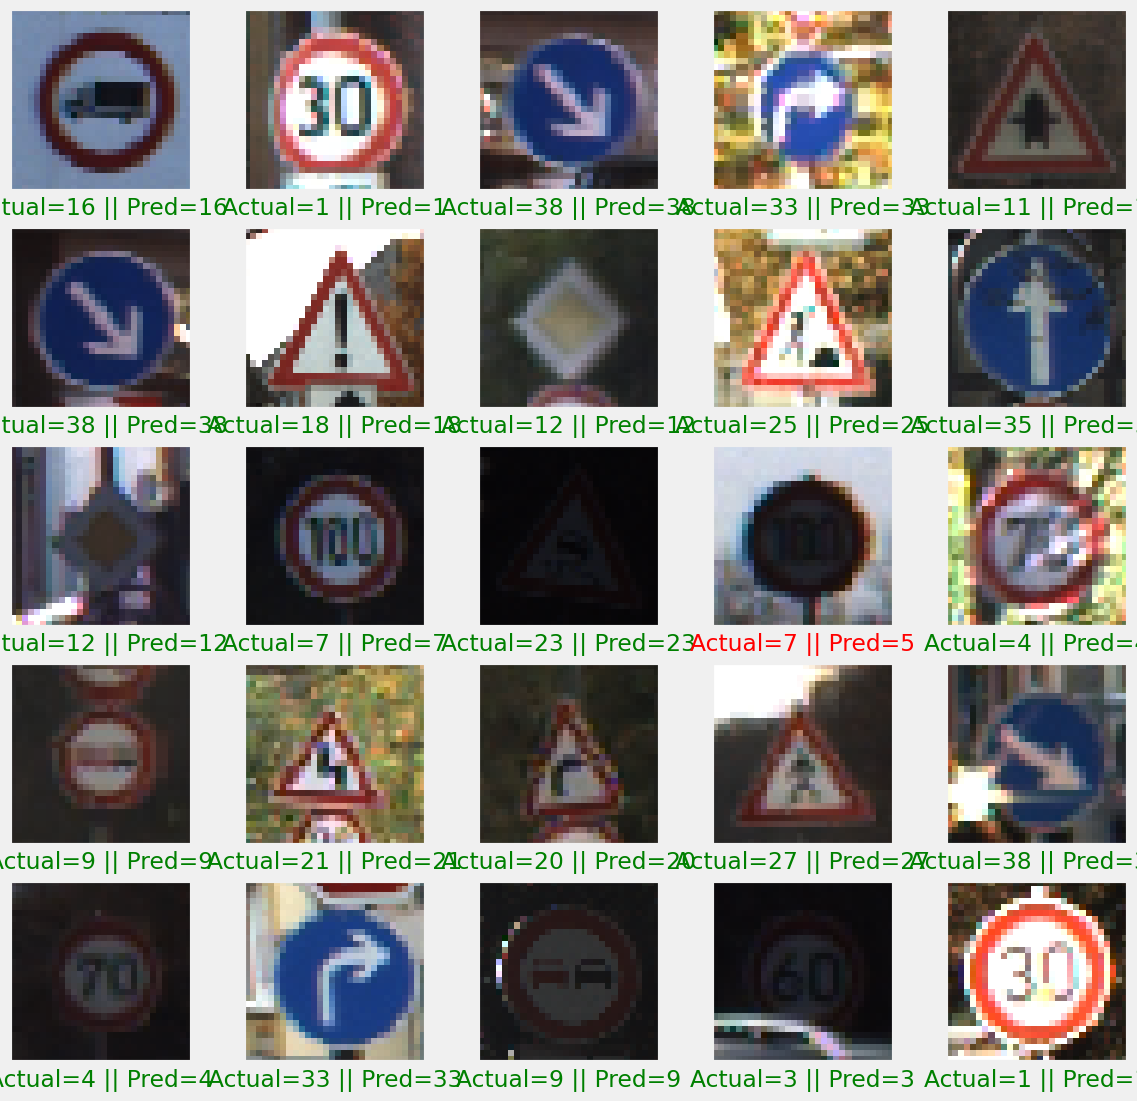

In [ ]:
#Î∂ÑÎ•òÎ™®Îç∏ Ï†ïÌôïÎèÑ
plt.figure(figsize = (13, 13))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = test_labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()

In [ ]:
#1. Î™®Îç∏ Ïª¥ÌååÏùº(categorical_crossentropy)
cnn=Sequential()

cnn.compile(loss='spare_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
#2. Î™®Îç∏ÌïôÏäµ
from keras.callbacks import ModelCheckpoint
import tensorflow as tf

checkpoint= ModelCheckpoint(filepath='cnn.weights.spara_categorical.hdf5',
                            vervose =1,
                            save_best_only=True)
hist2 = cnn.fit(x_train, y_train_encoded,
                 batch_size=256,
                 epochs=250,
                 validation_data=(x_val, y_val),
                 callbacks=[checkpoint],
                 verbose=2,
                 shuffle=True)



> CNN Î™®Îç∏Ïù¥ Ï†ïÌôïÎèÑÎäî ÎÜíÍ≥†, Ïò§Î≤ÑÌîºÌåÖÎèÑ Í±∞Ïùò Î∞úÏÉùÌïòÏßÄ ÏïäÎäî Î™®Îç∏
> CNN Î™®Îç∏ÏùÄ 2Í∞úÏùò Ïª®Î≥ºÎ£®ÏÖò Î†àÏù¥Ïñ¥ÏôÄ 1Í∞úÏùò Ìè¥ÎßÅ Î†àÏù¥Ïñ¥ : 70.55%


> **Ïò§Î≤ÑÌîºÌåÖ Ï†êÏ†ê Ï¶ùÍ∞Ä**
# ImageDatGeneratorÏùÑ Ïù¥Ïö©Ìï¥ Î≥ÄÌôî
- 7Í∞úÏùò Ïª®Î≥ºÎ£®ÏÖòÎ†àÏù¥Ïñ¥
- 5Í∞ú Ìè¥ÎßÅ Î†àÏù¥Ïñ¥
## Îçî ÎÜíÏùÄ Î†àÏù¥Ïñ¥Î•º ÏåìÏïÑÎ≥¥Î©¥?




# CIFAR10 CNN(sklearn)

In [ ]:
#1. ÎùºÏù¥Î∏åÎü¨Î¶¨

import numpy as np
from scipy import misc
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import cv2
import glob
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as matimage
%matplotlib inline

In [ ]:
#2. Îç∞Ïù¥ÌÑ∞ Î°úÎî© Î∞è Î∂ÑÎ¶¨

train = pd.read_csv('fashion_dataset/train.csv')
test = pd.read_csv('fashion_dataset/test.csv')

X_train = np.array(train.iloc[:, 1:])
y_train = np.array(train.iloc[:, 0])
X_test =  np.array(test.iloc[:, 1:])
y_test = np.array(test.iloc[:, 0])
train.shape

In [ ]:
#2-1. Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏

n_row = 1
n_col = 5
plt.figure(figsize=(10,8))
for i in list(range(n_row*n_col)):
    plt.subplot(n_row, n_col, i+1)
    plt.imshow(X_train[i,:].reshape(28,28), cmap="gray")
    title_text = "Image" + str(i+1)
    plt.title(title_text, size=6.5)

plt.show()

In [ ]:
#3. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

from sklearn.preprocessing import StandardScaler

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [ ]:
#3-1 Îç∞Ïù¥ÌÑ∞ Normalized ÌôïÏù∏

n_row = 1
n_col = 5
plt.figure(figsize=(10,8))
for i in list(range(n_row*n_col)):
    plt.subplot(n_row, n_col, i+1)
    plt.imshow(X_train[i,:].reshape(28,28), cmap="gray")
    title_text = "Image" + str(i+1)
    plt.title(title_text, size=6.5)

plt.show()

In [ ]:
#3-2 Í≥†Ïú†Î≤°ÌÑ∞, Í≥†Ïú†Í∞í, Í≥µÎ∂ÑÏÇ∞ ÌñâÎ†¨ Í≥ÑÏÇ∞

mean_vec = np.mean(X_train, axis=0)
cov_mat = np.cov(X_train.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print("Shape of Covariance matrix", cov_mat.shape)
eig_pairs = [(np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key = lambda x: x[0], reverse=True)
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [ ]:
#3-3 ÏïûÏóêÏÑú 400Í∞ú ÏÑ±Î∂Ñ ÌèâÍ∑† Î∂ÑÏÇ∞
add =0.0
for i in range(400):
    add+= var_exp[i]

print('first 400 components average variance: %.2f' % add)

In [ ]:
#4. Ï∞®ÏõêÏ∂ïÏÜå(PCA)

from sklearn.decomposition import PCA

n_components = 400
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

In [ ]:
#4-1 Ïù¥ÎØ∏ÏßÄ ÌôïÏù∏
eigenvalues = pca.components_.reshape(n_components, 28, 28)
eigenvalues = pca.components_
print("Eigenvalues shape:", eigenvalues.shape)

n_row = 1
n_col = 5
plt.figure(figsize=(10,8))
for i in list(range(n_row*n_col)):
    plt.subplot(n_row, n_col, i+1)
    plt.imshow(eigenvalues[i,:].reshape(28,28), cmap="gray")
    title_text = "Image" + str(i+1)
    plt.title(title_text, size=6.5)

plt.show()

##Classification

In [ ]:
#1. classification

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

In [ ]:
#2. Gaussioan classifier
gNB = GaussianNB()
gNB.fit(X_train_pca,y_train)
nb_predict = gNB.predict(X_test_pca)

print(metrics.classification_report(y_test, nb_predict))
accuracy = metrics.accuracy_score(y_test, nb_predict)
average_accuracy = np.mean(y_test == nb_predict) * 100
print("The average_accuracy is {0:.1f}%".format(average_accuracy))

In [ ]:
#3. SVM classifier
svm = SVC()
svm.fit(X_train_pca,y_train)
svm_predict = svm.predict(X_test_pca)

print(metrics.classification_report(y_test, svm_predict))
accuracy = metrics.accuracy_score(y_test, svm_predict)
average_accuracy = np.mean(y_test == svm_predict) * 100
print("The average_accuracy is {0:.1f}%".format(average_accuracy))

In [ ]:
#4. MLP classifier
MLP= MLPClassifier()
MLP.fit(X_train_pca,y_train)
mlp_predict = MLP.predict(X_test_pca)

print(metrics.classification_report(y_test, mlp_predict))
accuracy = metrics.accuracy_score(y_test, mlp_predict)
average_accuracy = np.mean(y_test == mlp_predict) * 100
print("The average_accuracy is {0:.1f}%".format(average_accuracy))

## 2ÏßÑÌôî Ï≤òÎ¶¨


In [ ]:
#1. 2ÏßÑÌôî Ï≤òÎ¶¨
from sklearn.preprocessing import Binarizer
binarizer = Binarizer()
train_binary = binarizer.fit_transform(X_train)
test_binary = binarizer.fit_transform(X_test)
train_binary.shape

In [ ]:
#1-1 Ïù¥ÎØ∏ÏßÄÏ∂úÎ†•
n_row = 1
n_col = 5
plt.figure(figsize=(10,8))
for i in list(range(n_row*n_col)):
    plt.subplot(n_row, n_col, i+1)
    plt.imshow(train_binary[i,:].reshape(28,28), cmap="binary")
    title_text = "Image" + str(i+1)
    plt.title(title_text, size=6.5)

plt.show()

In [ ]:
#2. Gaussioan classifier
gNB = GaussianNB()
gNB.fit(train_binary,y_train)
nb_predict = gNB.predict(test_binary)

print(metrics.classification_report(y_test, nb_predict))
accuracy = metrics.accuracy_score(y_test, nb_predict)
average_accuracy = np.mean(y_test == nb_predict) * 100
print("The average_accuracy is {0:.1f}%".format(average_accuracy))

In [ ]:
#3. SVM
svm = SVC()
svm.fit(train_binary,y_train)
svm_predict = svm.predict(test_binary)

print(metrics.classification_report(y_test, svm_predict))
accuracy = metrics.accuracy_score(y_test, svm_predict)
average_accuracy = np.mean(y_test == svm_predict) * 100
print("The average_accuracy is {0:.1f}%".format(average_accuracy))

In [ ]:
# MLP
# ÌïòÎÇòÏùò Î†àÏù¥Ïñ¥ÏôÄ 100Í∞úÏùò Îâ¥Îü∞ ÏÇ¨Ïö©
MLP= MLPClassifier()
MLP.fit(train_binary,y_train)
mlp_predict = MLP.predict(test_binary)

print(metrics.classification_report(y_test, mlp_predict))
accuracy = metrics.accuracy_score(y_test, mlp_predict)
average_accuracy = np.mean(y_test == mlp_predict) * 100
print("The average_accuracy is {0:.1f}%".format(average_accuracy))

In [ ]:
#1. Ï†ÑÏ≤òÎ¶¨

from tensorflow.keras.datasets import fashion_mnist
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


In [ ]:
#1-1 Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨
# Ï†ÑÏ≤¥ 6ÎßåÍ∞ú Îç∞Ïù¥ÌÑ∞ Ï§ë, 5ÎßåÍ∞úÎäî ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïö©, 1ÎßåÍ∞úÎäî ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïö©ÏúºÎ°ú Î∂ÑÎ¶¨
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
#1-2. Ïä§ÏºÄÏùºÎßÅ Î∞è ÌòïÎ≥ÄÌôò
def get_preprocessed_data(images, labels):
    # ÌïôÏäµÍ≥º ÌÖåÏä§Ìä∏ Ïù¥ÎØ∏ÏßÄ arrayÎ•º 0~1 ÏÇ¨Ïù¥Í∞íÏúºÎ°ú scale Î∞è float32 Ìòï Î≥ÄÌòï.
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)

    return images, labels

In [ ]:
#1-3 ÏõêÌï´Ïù∏ÏΩîÎî©
# 0 ~ 1ÏÇ¨Ïù¥Í∞í float32Î°ú Î≥ÄÍ≤ΩÌïòÎäî Ìï®Ïàò Ìò∏Ï∂ú Ìïú Îí§ OHE Ï†ÅÏö©
def get_preprocessed_ohe(images, labels):
    images, labels = get_preprocessed_data(images, labels)
    # OHE Ï†ÅÏö©
    oh_labels = to_categorical(labels)
    return images, oh_labels

In [ ]:
#ÌïôÏäµ,Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
# ÌïôÏäµ/Í≤ÄÏ¶ù/ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Ïóê Ï†ÑÏ≤òÎ¶¨ Î∞è OHE Ï†ÅÏö©Ìïú Îí§ Î∞òÌôò
def get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021):
    # ÌïôÏäµ Î∞è ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Î•º  0 ~ 1ÏÇ¨Ïù¥Í∞í float32Î°ú Î≥ÄÍ≤Ω Î∞è OHE Ï†ÅÏö©.
    train_images, train_oh_labels = get_preprocessed_ohe(train_images, train_labels)
    test_images, test_oh_labels = get_preprocessed_ohe(test_images, test_labels)

    # ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î•º Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Î°ú Îã§Ïãú Î∂ÑÎ¶¨
    tr_images, val_images, tr_oh_labels, val_oh_labels = train_test_split(train_images, train_oh_labels, test_size=valid_size, random_state=random_state)
    return (tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels )

In [ ]:
#1-5. Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨(ÌïôÏäµ/Í≤ÄÏ¶ù)
# Fashion MNIST Îç∞Ïù¥ÌÑ∞ Ïû¨ Î°úÎî© Î∞è Ï†ÑÏ≤òÎ¶¨ Ï†ÅÏö©ÌïòÏó¨ ÌïôÏäµ/Í≤ÄÏ¶ù/Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏ ÏÉùÏÑ±.

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)
(tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels) = \
    get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021)
print(tr_images.shape, tr_oh_labels.shape, val_images.shape, val_oh_labels.shape, test_images.shape, test_labels.shape)